<a href="https://colab.research.google.com/github/kumarnihal26/Customer-Segmentation-RFM-Analysis/blob/main/notebooks/RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv("online_retail_II.csv")
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.shape


(1067371, 8)

In [4]:
df.isnull().sum()


,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


In [5]:
df = df.dropna(subset=['Customer ID'])


In [6]:
df.shape


(824364, 8)

In [7]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [8]:
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]


In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [10]:
df.head()
df.isnull().sum()


,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [11]:
reference_date = df['InvoiceDate'].max()
reference_date


Timestamp('2011-12-09 12:50:00')

In [12]:
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'Invoice': 'nunique',
    'Price': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
Customer ID,,,
12346.0,325,12,207.40
12347.0,1,8,644.16
12348.0,74,5,193.10
12349.0,18,4,1480.44
12350.0,309,1,65.30


In [13]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])


In [14]:
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])


In [15]:
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])


In [16]:
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + \
                   rfm['F_Score'].astype(str) + \
                   rfm['M_Score'].astype(str)

rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
Customer ID,,,,,,,
12346.0,325,12,207.40,2,5,3,253
12347.0,1,8,644.16,5,4,5,545
12348.0,74,5,193.10,3,4,3,343
12349.0,18,4,1480.44,5,3,5,535
12350.0,309,1,65.30,2,1,2,212


In [18]:
def segment_customer(row):
    if row['RFM_Score'] == '555':
        return 'Best Customers'
    elif row['R_Score'] >= 4 and row['F_Score'] >= 4:
        return 'Loyal Customers'
    elif row['R_Score'] <= 2 and row['F_Score'] >= 3:
        return 'At Risk'
    else:
        return 'Need Attention'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)


In [19]:
rfm['Segment'].value_counts()


,count
Segment,
Need Attention,3572
Loyal Customers,1038
At Risk,824
Best Customers,444


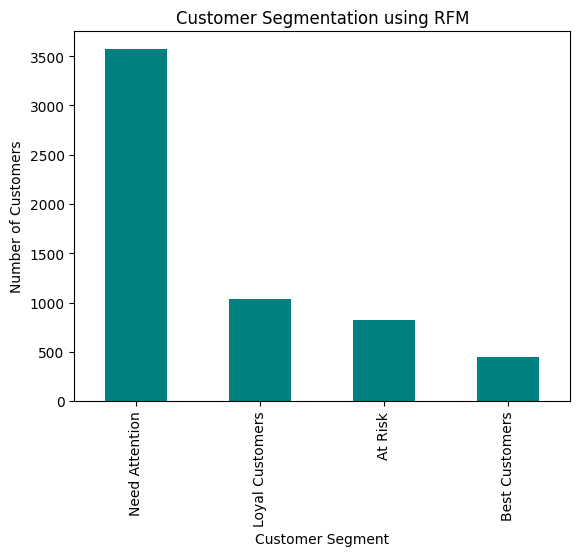

In [20]:
import matplotlib.pyplot as plt

rfm['Segment'].value_counts().plot(kind='bar', color='teal')
plt.title('Customer Segmentation using RFM')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()
